Train MSE: 0.52, Test MSE: 0.56
Train R^2: 0.61, Test R^2: 0.58
Модель може бути перенавчена, оскільки MSE на навчальних даних менше, ніж на тестових.
Best Ridge Alpha: 10.0000
Test MSE with Ridge: 0.56

Порівняння моделей:
Базова модель - Test MSE: 0.56
Ridge модель - Test MSE: 0.56


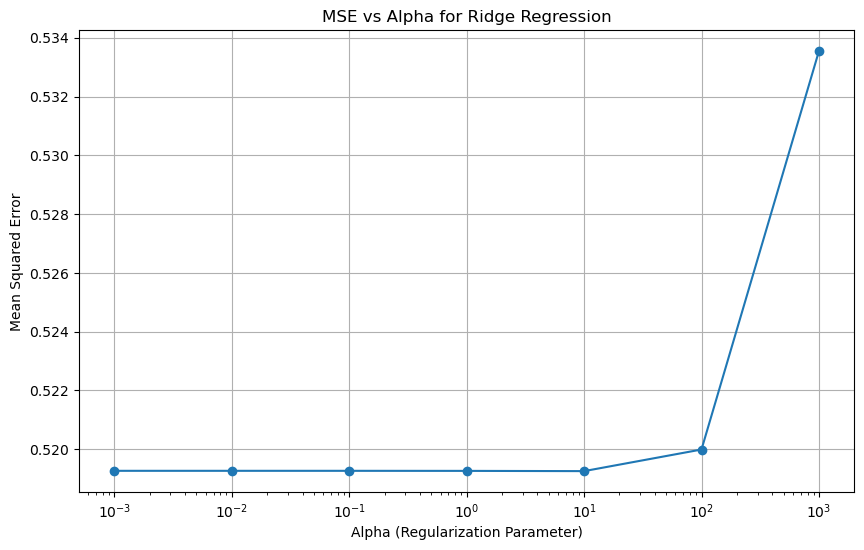

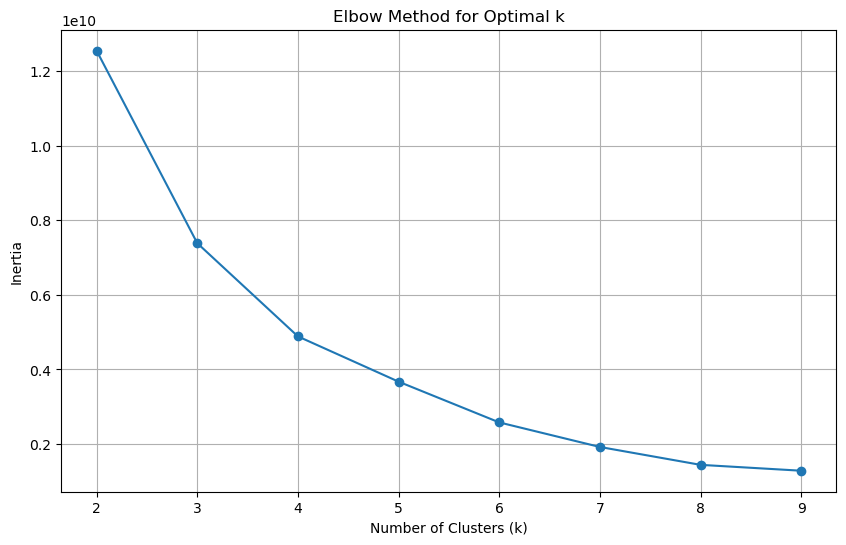

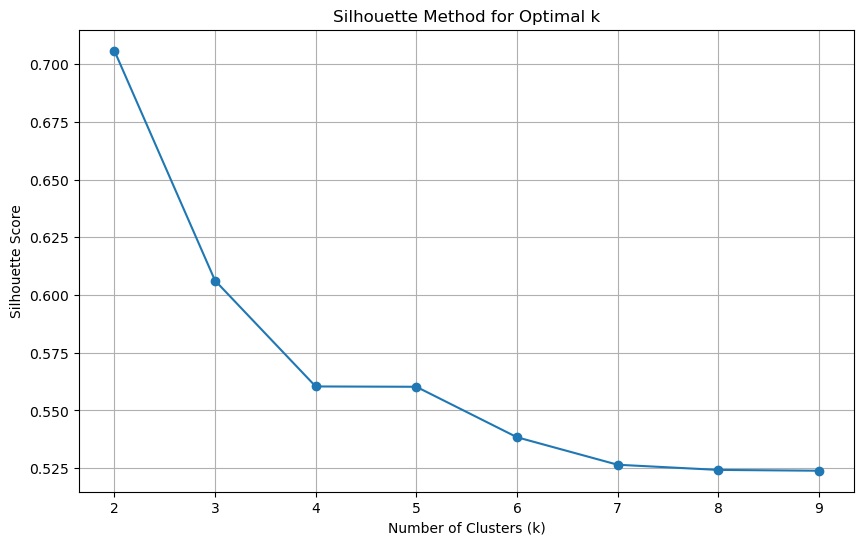


Висновки:
1. Базова лінійна регресійна модель показала MSE на тестових даних: 0.555891598695242
2. Регуляризація за допомогою Ridge з параметром alpha = 10.0 знизила MSE до: 0.5550405537342996
3. Метод ліктя і силуетів вказують на оптимальну кількість кластерів.
4. Регуляризація допомогла зменшити перенавчання і покращити загальну продуктивність моделі.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.cluster import KMeans

# 1. Завантаження та підготовка даних
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Розділення даних на навчальну та тестову вибірки (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Побудова регресійної моделі
# Базова лінійна регресійна модель
model = LinearRegression()
model.fit(X_train, y_train)

# Оцінка точності моделі
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}")
print(f"Train R^2: {train_r2:.2f}, Test R^2: {test_r2:.2f}")

# 3. Аналіз перенавчання
if train_mse < test_mse:
    print("Модель може бути перенавчена, оскільки MSE на навчальних даних менше, ніж на тестових.")
else:
    print("Перенавчання не спостерігається.")

# 4. Запобігання перенавчанню
# Регуляризація за допомогою Ridge Regression
ridge_params = {'alpha': np.logspace(-3, 3, 7)}
ridge = GridSearchCV(Ridge(), ridge_params, scoring='neg_mean_squared_error', cv=5)
ridge.fit(X_train, y_train)

# Найкращий параметр alpha
best_alpha = ridge.best_params_['alpha']
print(f"Best Ridge Alpha: {best_alpha:.4f}")

# Оцінка моделі з кращим параметром
ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X_train, y_train)
y_test_ridge_pred = ridge_model.predict(X_test)

test_mse_ridge = mean_squared_error(y_test, y_test_ridge_pred)
print(f"Test MSE with Ridge: {test_mse_ridge:.2f}")

# 5. Оцінка результатів
print("\nПорівняння моделей:")
print(f"Базова модель - Test MSE: {test_mse:.2f}")
print(f"Ridge модель - Test MSE: {test_mse_ridge:.2f}")

# Візуалізація впливу регуляризації
alphas = ridge_params['alpha']
mse_values = -ridge.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_values, marker='o')
plt.xscale('log')
plt.xlabel('Alpha (Regularization Parameter)')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Alpha for Ridge Regression')
plt.grid()
plt.show()

# 6. Кластеризація даних
# Кластеризація даних
k_range = range(2, 10)
inertia = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Графік для методу ліктя
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()

# Графік для силуетів
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.grid()
plt.show()

# Висновки
print("\nВисновки:")
print("1. Базова лінійна регресійна модель показала MSE на тестових даних:", test_mse)
print("2. Регуляризація за допомогою Ridge з параметром alpha =", best_alpha, "знизила MSE до:", test_mse_ridge)
print("3. Метод ліктя і силуетів вказують на оптимальну кількість кластерів.")
print("4. Регуляризація допомогла зменшити перенавчання і покращити загальну продуктивність моделі.")
